In [1]:
import pandas as pd
import numpy as ap
import matplotlib.pyplot as plt 
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv(r"C:\Users\mishr\OneDrive\Desktop\churn analysis.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no" 
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

### Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

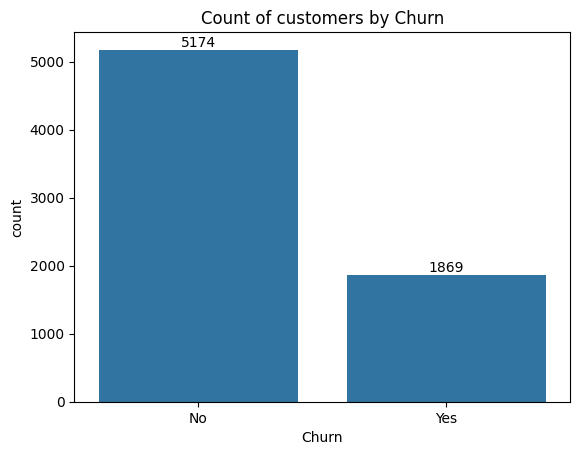

In [ ]:
ax = sns.countplot(x=df["Churn"])
plt.title("Count of customers by Churn")

ax.bar_label(ax.containers[0])
plt.show()

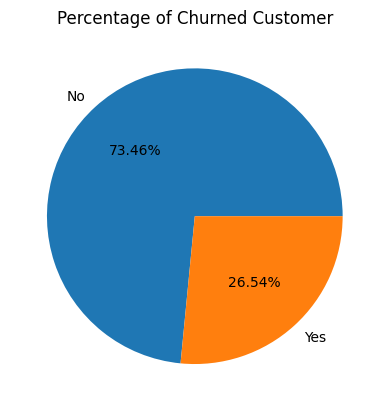

In [ ]:
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customer")
plt.show()

### from the given pie chart we can conclude that 26.54% of our customers have churned out.
### now lets explore reasons behind it  

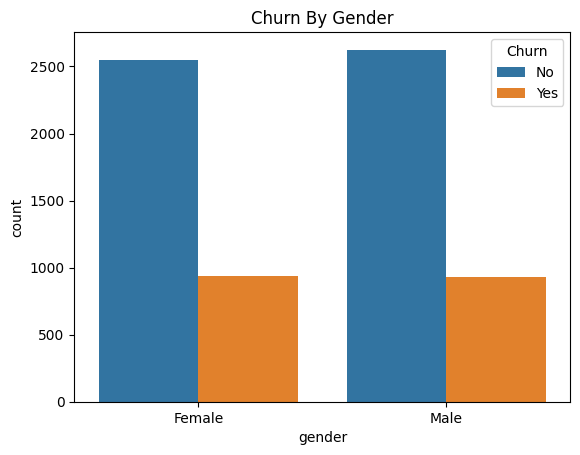

In [ ]:
plt.Figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

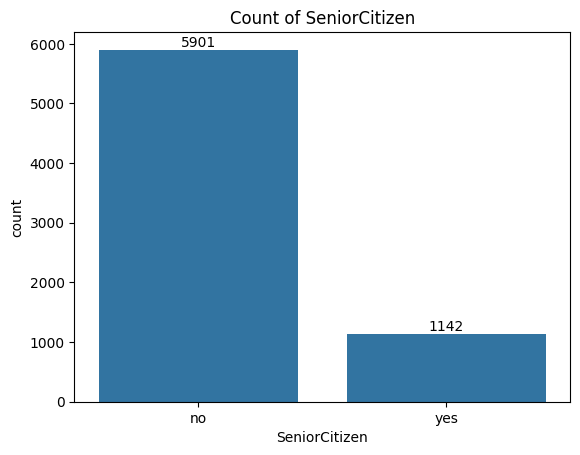

In [ ]:
plt.Figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen")
plt.show()

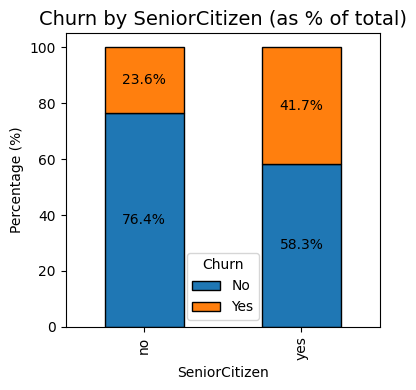

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert to percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with default colors (blue & orange)
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(4,4),
    edgecolor='black'  # just for better visuals
)

# Add percentage labels
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10)

# Title and labels
plt.title('Churn by SeniorCitizen (as % of total)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### Comparative a greater percentage of people in senior citizen category have churned

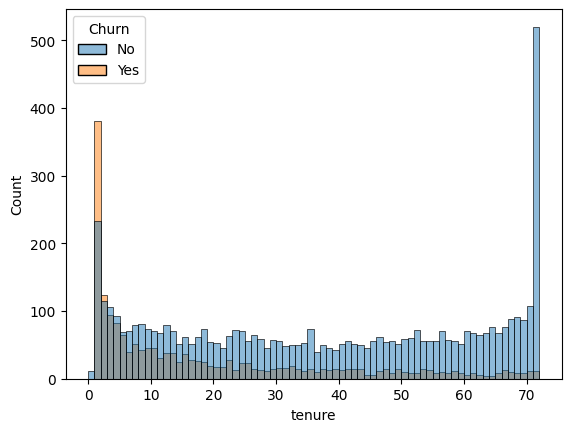

In [ ]:
plt.Figure(figsize=(9,4))
sns.histplot(x = "tenure",data = df,bins=72,hue="Churn")
plt.show()

### people who have used our services for a long time have stayed and people who have used our services #1 or 2 month have churned

In [2]:
plt.Figure(figsize=(4,4))
ax = sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

NameError: name 'sns' is not defined

### people who have month to month contract are likely churn them from those who have 1 or 2 years of contract

In [3]:
df.columns.values

NameError: name 'df' is not defined

NameError: name 'sns' is not defined

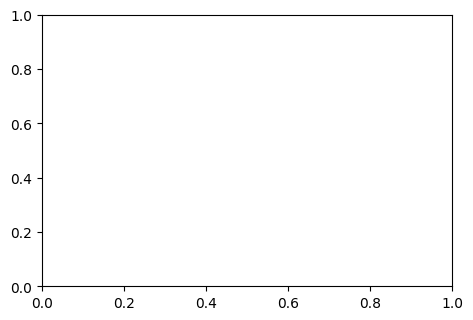

In [4]:

# List of categorical columns
cat_cols = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define subplot grid
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols   # no math module needed

# Slightly darker palette (blue/orange style)
palette = ['#1f77b4', '#ff7f0e']  # matplotlib default darker blue & orange

# Create subplots
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, hue='Churn', palette=palette, alpha=0.9)
    plt.title(f'Count of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


### The visualizations show that customers who don’t use additional internet-related services such as OnlineSecurity, TechSupport, or DeviceProtection are more likely to churn. Users with multiple or bundled services show lower churn rates. Overall, the data suggests that engaged customers with more active service features tend to remain loyal, while minimal-service users are at a higher risk of leaving.

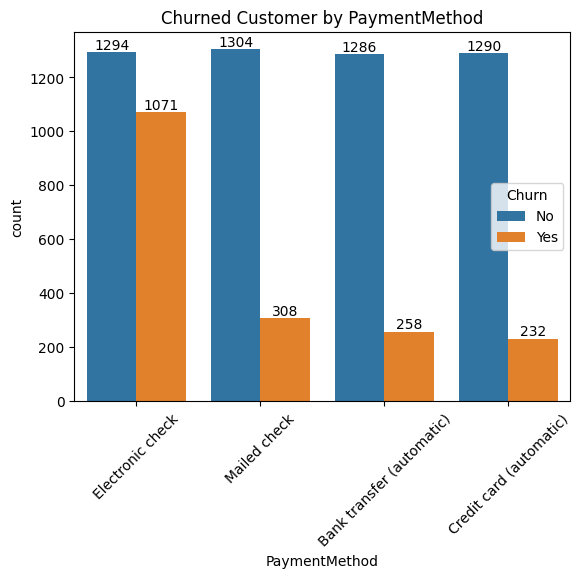

In [ ]:
plt.Figure(figsize=(6,4))
ax = sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

### Customer is likely to churn when he is using electronic check as a payment method